# Import libraries

In [ ]:
#LIBRARIES
import random
random.seed(10)

import numpy
import pandas as pd

from wordcloud import WordCloud

import nltk
#nltk.download('all')

import gensim
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

import tqdm


#Visualize TOPIC=25
!pip install -q pyLDAvis==2.1.2
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
#import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

from pprint import pprint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Import data

In [ ]:
df = pd.read_csv('train_sport_tok_lem.csv', sep = ';')
df

,document,summary,id,URL,category,doc_bigram,doc_trigram
0,"['ferrari', 'appeared', 'position', 'challenge...",Lewis Hamilton stormed to pole position at the...,35951548,http://web.archive.org/web/20160403040918/http...,formula1,"['ferrari', 'appeared', 'position', 'challenge...","['ferrari', 'appeared', 'position', 'challenge..."
1,"['simone', 'favaro', 'got', 'crucial', 'try', ...",Defending Pro12 champions Glasgow Warriors bag...,34540833,http://web.archive.org/web/20151017072732/http...,rugby-union,"['simone_favaro', 'got', 'crucial', 'try', 'la...","['simone_favaro', 'got', 'crucial', 'try', 'la..."
2,"['belgian', 'cyclist', 'demoitie', 'died', 'co...",Welsh cyclist Luke Rowe says changes to the sp...,35932467,http://web.archive.org/web/20160404024929/http...,wales,"['belgian', 'cyclist', 'demoitie', 'died', 'co...","['belgian', 'cyclist', 'demoitie', 'died', 'co..."
3,"['gundogan', 'told', 'bbc', 'sport', 'see', 'f...",Manchester City midfielder Ilkay Gundogan says...,40758845,http://web.archive.org/web/20170729030028/http...,football,"['gundogan', 'told', 'bbc', 'sport', 'see', 'f...","['gundogan', 'told', 'bbc', 'sport', 'see', 'f..."
4,"['bath', 'born', 'player', 'made', 'appearance...",Newport Gwent Dragons number eight Ed Jackson ...,38900884,http://web.archive.org/web/20170208052041/http...,rugby-union,"['bath', 'born', 'player', 'made', 'appearance...","['bath', 'born', 'player', 'made', 'appearance..."
...,...,...,...,...,...,...,...
49797,"['medium', 'playback', 'supported', 'devicethe...",It has been described as the greatest comeback...,24285864,http://web.archive.org/web/20151011193645/http...,sailing,"['media_playback', 'supported_devicethe', 'ame...","['medium', 'playback', 'supported_devicethe', ..."
49798,"['welshman', 'five', 'par', 'third', 'round', ...",Jamie Donaldson says he is targeting his highe...,36817060,http://web.archive.org/web/20160717041047/http...,wales,"['welshman', 'five', 'par', 'third', 'round', ...","['welshman', 'five', 'par', 'third', 'round', ..."
49799,"['move', 'city', 'play', 'aggborough', 'home',...",Former £5m striker Lee Hughes has joined Natio...,34138004,http://web.archive.org/web/20170210153522/http...,football,"['move', 'city', 'play', 'aggborough', 'home',...","['move', 'city', 'play', 'aggborough', 'home',..."
49800,"['lincoln', 'red', 'imp', 'bring', 'lead', 'gl...",Erik Sviatchenko is adamant that Celtic will p...,36781065,http://web.archive.org/web/20160715233230/http...,football,"['lincoln', 'red_imps', 'bring', 'lead', 'glas...","['lincoln', 'red_imps', 'bring', 'lead', 'glas..."


# Wordcloud

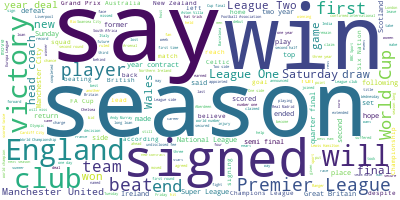

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(df['summary'].values))
long_string = long_string.replace("'",'').replace("[",'').replace("]",'').replace(",",'').strip()
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

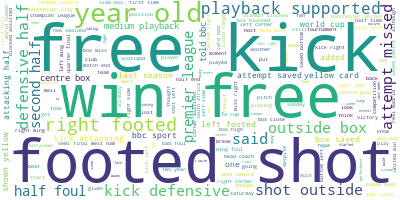

In [ ]:
# Join the different processed titles together.
long_string = ','.join(df['document'].values)
long_string = long_string.replace("'",'').replace("[",'').replace("]",'').replace(",",'').strip()

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# DOCUMENT and WORD REPRESENTATION

In [ ]:
lista=[]
i=0
for el in df['doc_trigram']:
  el = el.replace("'",'').replace("[",'').replace("]",'').replace(",",'').strip().split(' ')
  lista.insert(i,el)
  i+=1

df['doc_trigram'] = lista
df['doc_trigram'].head()

0    [ferrari, appeared, position, challenge, final...
1    [simone_favaro, got, crucial, try, last, move,...
2    [belgian, cyclist, demoitie, died, collision, ...
3    [gundogan, told, bbc, sport, see, finishing, l...
4    [bath, born, player, made, appearance, dragon,...
Name: doc_trigram, dtype: object

In [ ]:
dictionary = gensim.corpora.Dictionary(df['doc_trigram'])
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)

In [ ]:
bow_corpus = [dictionary.doc2bow(doc) for doc in df['doc_trigram']]

In [ ]:
[(dictionary[k], v) for k, v in bow_corpus[0][:25]]

[('able', 1),
 ('action', 1),
 ('adding', 1),
 ('admitting', 1),
 ('agreement', 1),
 ('ahead', 3),
 ('already', 1),
 ('also', 1),
 ('appeared', 2),
 ('arrived', 1),
 ('attempt', 1),
 ('australia', 2),
 ('back', 1),
 ('bahrain', 2),
 ('basis', 1),
 ('beat', 1),
 ('belgian', 2),
 ('benchmark', 1),
 ('best', 1),
 ('boss_bernie', 1),
 ('brit', 1),
 ('broken_rib', 1),
 ('button', 4),
 ('car', 8),
 ('challenge', 2)]

#HYPERPARAMETER TUNING

In topic modeling with Python, beta and alpha are hyperparameters for the Dirichlet prior distribution on the topic-word and document-topic distributions, respectively. The best values for beta and alpha depend on the specific dataset and task.

A smaller value of beta will result in a more sparse topic-word distribution, meaning that each topic will be associated with a smaller number of words. A larger value of beta will result in a more dense topic-word distribution, meaning that each topic will be associated with a larger number of words.

A smaller value of alpha will result in a more sparse document-topic distribution, meaning that each document will be associated with a smaller number of topics. A larger value of alpha will result in a more dense document-topic distribution, meaning that each document will be associated with a larger number of topics.

A common approach to finding the best values for beta and alpha is to use grid search or a similar method to train multiple models with different combinations of beta and alpha, and then evaluate their performance using a suitable metric such as perplexity or coherence.

It's also important to note that in topic modeling it's also important to consider other hyperparameter like the number of topics, the number of iterations of the algorithm, the type of prior distribution and so on.

However, in practice the best practice is to try different values and see which one performs best on your specific dataset, and also consider the computation time, as some combination could take a lot of time to converge.

In [ ]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           alpha=a,
                                           eta=b,
                                           passes=10)
    
    coherence_model_lda = CoherenceModel(model=lda_model, corpus=corpus, texts=df['doc_trigram'], coherence='c_v')
    
    return coherence_model_lda.get_coherence() 

In [ ]:
import numpy as np
from numpy import sum
#!pip install -U gensim

import tqdm
from gensim.models.coherencemodel import CoherenceModel


grid = {}
grid['Validation_Set'] = {}



# Topics range
min_topics = 20
max_topics = 26
step_size = 5
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = [0.1, 0.3, 0.5]
#alpha.append('symmetric')
#alpha.append('asymmetric')

# Beta parameter
beta = [0.01, 0.1, 0.3]
#beta.append('symmetric')

# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [gensim.utils.ClippedCorpus(bow_corpus, int(num_of_docs*0.75)), 
               bow_corpus]

corpus_title = ['75% Corpus', '100% Corpus']# 

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    pd.DataFrame(model_results).to_csv('LDA_trigrams_cv_result.csv', index=False)
                    pbar.update(1)
    
    pbar.close()

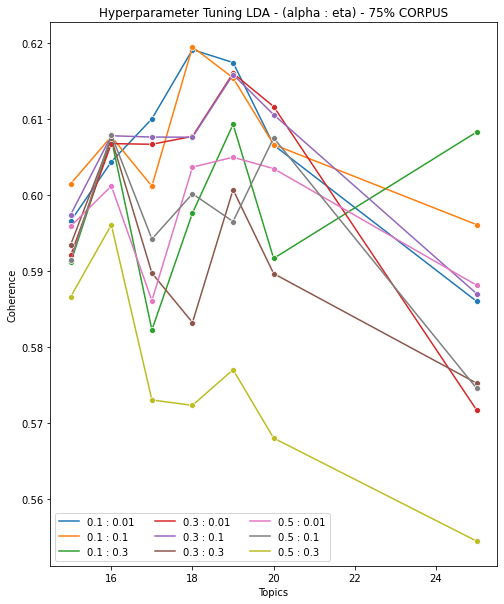

In [ ]:
import seaborn as sns



viz_df = pd.read_csv('LDA_trigrams_cv_result.csv', sep = ',')
viz_df['Hyper (alpha : eta)'] = viz_df['Alpha'].astype(str) + ' : ' + viz_df['Beta'].astype(str)


import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 10))



sns.lineplot(data=viz_df[viz_df['Validation_Set']=='75% Corpus'], x="Topics", y="Coherence", hue='Hyper (alpha : eta)', marker='o', ax=ax).set(title='Hyperparameter Tuning LDA - (alpha : eta) - 75% CORPUS')

plt.legend(loc="lower left", ncol=3)
plt.show()

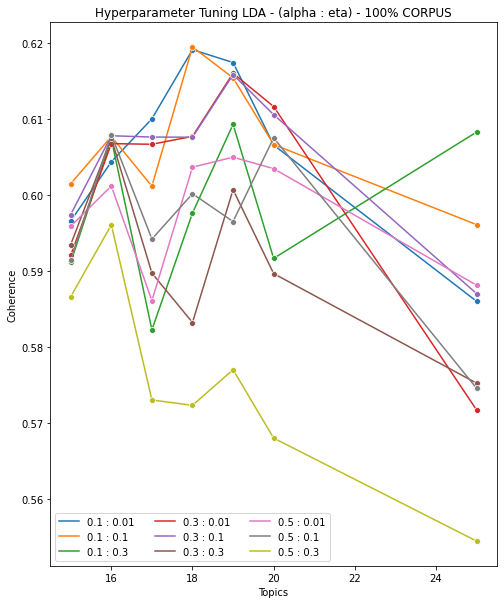

In [ ]:
import seaborn as sns



viz_df = pd.read_csv('LDA_trigrams_cv_result.csv', sep = ',')
viz_df['Hyper (alpha : eta)'] = viz_df['Alpha'].astype(str) + ' : ' + viz_df['Beta'].astype(str)


import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 10))



sns.lineplot(data=viz_df[viz_df['Validation_Set']=='75% Corpus'], x="Topics", y="Coherence", hue='Hyper (alpha : eta)', marker='o', ax=ax).set(title='Hyperparameter Tuning LDA - (alpha : eta) - 100% CORPUS')

plt.legend(loc="lower left", ncol=3)
plt.show()

# Final model

In [ ]:
lda_model = gensim.models.LdaModel(bow_corpus, id2word=dictionary, num_topics=20, offset=2, random_state=100 alpha='auto', eta='auto', per_word_topics=True)

In [ ]:
lda_model.alpha

array([0.03779157, 0.25401267, 0.04917386, 0.03387242, 0.1354699 ,
       0.07325596, 0.07626673, 0.06909663, 0.03919839, 0.03341977,
       0.2958818 , 0.05202449, 0.04288482, 0.14646539, 0.12199864,
       0.04730675, 0.09462529, 0.05245484, 0.05010435, 0.07254802],
      dtype=float32)

In [ ]:
lda_model.eta

array([0.5838012 , 0.5751852 , 0.4114717 , ..., 0.01060823, 0.01089995,
       0.01063277], dtype=float32)

In [ ]:
pprint(lda_model.print_topics())

[(0,
  '0.067*"wale" + 0.016*"try" + 0.014*"welsh" + 0.013*"williams" + '
  '0.012*"davy" + 0.011*"scarlet" + 0.011*"jones" + 0.010*"osprey" + '
  '0.008*"match" + 0.008*"super"'),
 (1,
  '0.037*"club" + 0.029*"season" + 0.028*"league" + 0.016*"player" + '
  '0.013*"last" + 0.011*"old" + 0.010*"manager" + 0.008*"one" + 0.008*"side" + '
  '0.008*"new"'),
 (2,
  '0.015*"rugby" + 0.014*"try" + 0.011*"ireland" + 0.011*"scotland" + '
  '0.010*"england" + 0.009*"half" + 0.008*"back" + 0.007*"side" + '
  '0.006*"six_nations" + 0.006*"last"'),
 (3,
  '0.047*"city" + 0.039*"lady" + 0.034*"woman" + 0.031*"mk_dons" + '
  '0.030*"cambridge" + 0.030*"exeter" + 0.029*"oxford" + '
  '0.026*"doncaster_rovers" + 0.019*"fleetwood_town" + 0.016*"chelsea"'),
 (4,
  '0.015*"sport" + 0.009*"football" + 0.008*"bbc" + 0.007*"would" + '
  '0.007*"also" + 0.006*"world" + 0.004*"fifa" + 0.004*"decision" + '
  '0.004*"club" + 0.004*"say"'),
 (5,
  '0.015*"world" + 0.012*"number" + 0.012*"round" + 0.012*"one" + '


In [ ]:
#Visualize TOPIC=20
!pip install -q pyLDAvis==2.1.2
import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

p = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary, mds='tsne')
pyLDAvis.save_html(p, 'lda_viz.html')

In [ ]:
perplexity_20 = lda_model.log_perplexity(bow_corpus)

In [ ]:
print('Perplexity: ', perplexity_20)

Perplexity:  -7.626020122780861


In [ ]:
#COMPUTING COHERENCE LAST
from gensim.models.coherencemodel import CoherenceModel
cm = CoherenceModel(model=lda_model, corpus=bow_corpus, texts=df['doc_trigram'], coherence='u_mass')
coherence_lda = cm.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  -1.7226692030137165


In [ ]:
#saving model to disk.
from gensim.test.utils import datapath

temp_file = datapath("lda_model_trigrams_20_final.gensim")


lda_model.save(temp_file)

In [ ]:
#loading model from disk
from gensim.test.utils import datapath
from gensim import  models

temp_file = datapath("lda_model_trigrams_20_final.gensim")

lda_model = models.ldamodel.LdaModel.load(temp_file)